In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import csv

In [17]:
def load_info(path):
    info = {}
    with open(r'C:\Users\mayda\Python practice\OR\LP_results_new.csv') as f:
        myCsv = csv.reader(f)
        for row in myCsv:
            x = np.array(row[1:], dtype=float)
            y = x.astype(int)
            info[row[0]] = y
    
    return info['B'][0], info['L'][0], info['w'][0], np.flip(info['X']), np.flip(info['Xe']), np.flip(info['E']) 


In [18]:
def DRAW(B, L, w, X, Xe, E):
    """
    X : Full interior rows (兩內部、一通道) F3 = 2*C3 + D1
    Xe : Full exterior rows (一貼牆、一通道、一內部) F1 = C1 + C3 + D1
    E : Exterior (一條貼牆、一通道) C1 + D1
    n : X 車格數
    ne : Xe 車格數
    nEE : E 車格數
    """ 
    params = {'F3':[10.30, 12.55, 14.80, 17.40, 18.00],
            'F1':[11.40, 13.45, 15.65, 17.75, 18.00],
            'C1':[4.50, 5.30, 5.60, 5.50, 5.00],
            
            'C3':[3.40, 4.40, 5.05, 5.15, 5.00],
            'C4': [6.0, 6.5, 6.6, 6.3, 5.5],
            'C5': [6.0, 6.15, 6.05, 5.40, 4.40],
            'C6': [2.0, 2.2, 2.24, 2.12, 1.8],
            'C7': [2.0, 2.06, 2.02, 1.76, 1.36],
            'D1':[3.5, 3.75, 4.5, 6.00, 7.00],
            'D2':[2.8, 2.4, 1.8, 1.5, 1.4]}

    angle_color = {0:'olive', 1:'blue', 2:'red', 3:'green', 4:'orange'}

    twoway = 2*w
    # Create a figure and axes
    fig, ax = plt.subplots()
    # Set the limits of the axes
    ax.set_xlim(0, B)
    ax.set_ylim(0, L)
    plt.axis('scaled')

    # Define your colors and content
    colors = ['olive', 'blue', 'red', 'green', 'orange']
    content = ['30 degree', '45 degree', '60 degree', '75 degree', '90 degree']

    """
    Draw E, Xe, XeBev, EBev, XeMot, EMot -> left to right   
    """
    numE = np.sum(E)
    numXe = np.sum(Xe)
    numXeBev = np.sum(XeBev)
    numEBev = np.sum(EBev)
    numXeMot = np.sum(XeMot)
    numEMot = np.sum(EMot)
    left = 0
    right = 0
    if numE==1 and numXe==1:
        # first draw Xe, then E
        for index, value in enumerate(Xe):
            if value==1:
                x1, y1 = [params['C1'][index], params['C1'][index]], [0, L]
                plt.plot(x1, y1, color="blue")
                x1, y1 = [params['C1'][index]+params['D1'][index], params['C1'][index]+params['D1'][index]], [twoway, L-twoway]
                plt.plot(x1, y1, color="blue", linestyle="--")
                x1, y1 = [params['F1'][index], params['F1'][index]], [twoway, L-twoway]
                plt.plot(x1, y1, color="blue", linestyle="--")
                x1, y1 = [params['C1'][index]+params['D1'][index], params['F1'][index]], [twoway, twoway]
                plt.plot(x1, y1, color="blue", linestyle="--")
                x1, y1 = [params['C1'][index]+params['D1'][index], params['F1'][index]], [L-twoway, L-twoway]
                plt.plot(x1, y1, color="blue", linestyle="--")

                plt.axvspan(0, params['C1'][index], alpha=0.3, color=angle_color[index])
                plt.plot()
                plt.axvspan(params['C1'][index]+params['D1'][index], params['F1'][index], ymin=twoway/L, 
                            ymax=1-twoway/L, alpha=0.3, color=angle_color[index])
                plt.plot()

                left = params['F1'][index]
        for index, value in enumerate(E):
            if value == 1:
                #print(params['C1'][index], params['D'][index])
                x1, y1 = [B - params['C1'][index], B - params['C1'][index]], [0, L]
                plt.plot(x1, y1, color="red")
                x1, y1 = [B-params['C1'][index]-params['D1'][index], B-params['C1'][index]-params['D1'][index]], [twoway, L-twoway]
                plt.plot(x1, y1, color="red", linestyle="--")
                plt.axvspan(B - params['C1'][index], B, alpha=0.3, color=angle_color[index])
                plt.plot()
                right = B-params['C1'][index]-params['D1'][index]

    if numE==0 and numXe==2:
        cnt = 0
        for index, binary in enumerate(Xe):
            if binary >= 1 and cnt == 0:
                x1, y1 = [params['C1'][index], params['C1'][index]], [0, L]
                plt.plot(x1, y1, color="blue")
                x1, y1 = [params['C1'][index]+params['D1'][index], params['C1'][index]+params['D1'][index]], [twoway, L-twoway]
                plt.plot(x1, y1, color="blue", linestyle="--")
                x1, y1 = [params['F1'][index], params['F1'][index]], [twoway, L-twoway]
                plt.plot(x1, y1, color="blue", linestyle="--")
                x1, y1 = [params['C1'][index]+params['D1'][index], params['F1'][index]], [twoway, twoway]
                plt.plot(x1, y1, color="blue", linestyle="--")
                x1, y1 = [params['C1'][index]+params['D1'][index], params['F1'][index]], [L-twoway, L-twoway]
                plt.plot(x1, y1, color="blue", linestyle="--")
                
                plt.axvspan(0, params['C1'][index], alpha=0.3, color=angle_color[index])
                plt.plot()
                plt.axvspan(params['C1'][index]+params['D1'][index], params['F1'][index], ymin=twoway/L, 
                            ymax=1-twoway/L, alpha=0.3, color=angle_color[index])
                plt.plot()
                left = params['F1'][index]
                cnt += 1
                if binary == 2:
                    x1, y1 = [B - params['C1'][index], B - params['C1'][index]], [0, L]
                    plt.plot(x1, y1, color="blue")
                    x1, y1 = [B-params['C1'][index]-params['D1'][index], B-params['C1'][index]-params['D1'][index]], [twoway, L-twoway]
                    plt.plot(x1, y1, color="blue", linestyle="--")
                    x1, y1 = [B-params['F1'][index], B-params['F1'][index]], [twoway, L-twoway]
                    plt.plot(x1, y1, color="blue", linestyle="--")
                    right = B-params['F1'][index]
                    x1, y1 = [B-params['C1'][index]-params['D1'][index], B-params['F1'][index]], [twoway, twoway]
                    plt.plot(x1, y1, color="blue", linestyle="--")
                    x1, y1 = [B-params['C1'][index]-params['D1'][index], B-params['F1'][index]], [L-twoway, L-twoway]
                    plt.plot(x1, y1, color="blue", linestyle="--")
                    
                    plt.axvspan(B - params['C1'][index], B, alpha=0.3, color=angle_color[index])
                    plt.plot()
                    plt.axvspan(B-params['F1'][index], B-params['C1'][index]-params['D'][index], ymin=twoway/L, 
                                ymax=1-twoway/L, alpha=0.3, color=angle_color[index])
                    plt.plot()
                    cnt += 1
            elif binary == 1 and cnt == 1:
                x1, y1 = [B - params['C1'][index], B - params['C1'][index]], [0, L]
                plt.plot(x1, y1, color="blue")
                x1, y1 = [B-params['C1'][index]-params['D1'][index], B-params['C1'][index]-params['D1'][index]], [twoway, L-twoway]
                plt.plot(x1, y1, color="blue", linestyle="--")
                x1, y1 = [B-params['F1'][index], B-params['F1'][index]], [twoway, L-twoway]
                plt.plot(x1, y1, color="blue", linestyle="--")
                right = B-params['F1'][index]
                x1, y1 = [B-params['C1'][index]-params['D1'][index], B-params['F1'][index]], [twoway, twoway]
                plt.plot(x1, y1, color="blue", linestyle="--")
                x1, y1 = [B-params['C1'][index]-params['D1'][index], B-params['F1'][index]], [L-twoway, L-twoway]
                plt.plot(x1, y1, color="blue", linestyle="--")
                plt.axvspan(B - params['C1'][index], B, alpha=0.3, color=angle_color[index])
                plt.plot()
                plt.axvspan(B-params['F1'][index], B-params['C1'][index]-params['D1'][index], ymin=twoway/L, 
                            ymax=1-twoway/L, alpha=0.3, color=angle_color[index])
                plt.plot()

    if numE==2 and numXe==0:
        cnt = 0
        for index, binary in enumerate(E):
            if binary >= 1 and cnt == 0:
                x1, y1 = [params['C1'][index], params['C1'][index]], [0, L]
                plt.plot(x1, y1, color="red")
                x1, y1 = [params['C1'][index]+params['D1'][index], params['C1'][index]+params['D1'][index]], [twoway, L-twoway]
                plt.plot(x1, y1, color="red", linestyle="--")
                left = params['C1'][index]+params['D1'][index]
                plt.axvspan(0, params['C1'][index], alpha=0.3, color=angle_color[index])
                plt.plot()

                cnt += 1
                if binary == 2:
                    x1, y1 = [B - params['C1'][index], B - params['C1'][index]], [0, L]
                    plt.plot(x1, y1, color="red")
                    x1, y1 = [B-params['C1'][index]-params['D1'][index], B-params['C1'][index]-params['D1'][index]], [twoway, L-twoway]
                    plt.plot(x1, y1, color="red", linestyle="--")
                    right = B-params['C1'][index]-params['D1'][index]
                    plt.axvspan(B - params['C1'][index], B, alpha=0.3, color=angle_color[index])
                    plt.plot()
                    cnt += 1
            elif binary == 1 and cnt == 1:
                x1, y1 = [B - params['C1'][index], B - params['C1'][index]], [0, L]
                plt.plot(x1, y1, color="red")
                x1, y1 = [B-params['C1'][index]-params['D1'][index], B-params['C1'][index]-params['D1'][index]], [twoway, L-twoway]
                plt.plot(x1, y1, color="red", linestyle="--")
                right = B-params['C1'][index]-params['D1'][index]
                plt.axvspan(B - params['C1'][index], B, alpha=0.3, color=angle_color[index])
                plt.plot()
                
    """
    Draw X -> left to right   
    """
    for index, num in enumerate(X):
        for iter in range(num):
            #c3 + d + c3 = f3
            x1, y1 = [left, left], [twoway, L-twoway]
            plt.plot(x1, y1, color="green", linestyle="--")
            x1, y1 = [left + params['C3'][index], left + params['C3'][index]], [twoway, L-twoway]
            plt.plot(x1, y1, color="green", linestyle="--")
            x1, y1 = [left + params['C3'][index] + params['D1'][index], left + params['C3'][index] + params['D1'][index]], [twoway, L-twoway]
            plt.plot(x1, y1, color="green", linestyle="--")
            x1, y1 = [left + params['F3'][index], left + params['F3'][index]], [twoway, L-twoway]
            plt.plot(x1, y1, color="green", linestyle="--")

            x1, y1 = [left, left + params['C3'][index]], [twoway, twoway]
            plt.plot(x1, y1, color="green", linestyle="--")
            x1, y1 = [left, left + params['C3'][index]], [L-twoway, L-twoway]
            plt.plot(x1, y1, color="green", linestyle="--")

            x1, y1 = [left + params['C3'][index] + params['D1'][index], left + params['F3'][index]], [twoway, twoway]
            plt.plot(x1, y1, color="green", linestyle="--")
            x1, y1 = [left + params['C3'][index] + params['D1'][index], left + params['F3'][index]], [L-twoway, L-twoway]
            plt.plot(x1, y1, color="green", linestyle="--")

            plt.axvspan(left, left + params['C3'][index], alpha=0.3, color=angle_color[index], ymin=twoway/L, 
                            ymax=1-twoway/L)
            plt.plot()
            plt.axvspan(left + params['C3'][index] + params['D1'][index], left + params['F3'][index], ymin=twoway/L, 
                            ymax=1-twoway/L, alpha=0.3, color=angle_color[index])
            plt.plot()
            
            left = left + params['F3'][index]
    
    # Create empty plot with specified colors and labels
    colors = ['red', 'green', 'blue']
    line_styles = ['-', '--', '--']
    content = ['Exterior', 'Full Interior', 'Full Exterior']
    # Create empty plot with specified colors, line styles, and labels
    for color, linestyle, label in zip(colors, line_styles, content):
        plt.plot([], [], color=color, linestyle=linestyle, label=label)
    # Create the legend
    legend1 = plt.legend(title='Spot Type (line-style)',bbox_to_anchor=(1, 0.3))
    plt.gca().add_artist(legend1)
    
    # Define your colors and content
    colors = ['olive', 'blue', 'red', 'green', 'orange']
    content = ['30 degree', '45 degree', '60 degree', '75 degree', '90 degree']

    # Create custom legend handles with thicker lines
    legend_handles = []
    for color, label in zip(colors, content):
        line = mlines.Line2D([], [], color=color, label=label, linewidth=8)
        legend_handles.append(line)

    # Create the legend with custom handles
    plt.legend(title='Angles (Color-Filled)', handles=legend_handles, bbox_to_anchor=(1, 0.8))
    # Show the legend
    plt.show()

In [19]:
def Draw(path):
    B, L, w, X, Xe, E = load_info(path)
    DRAW(B, L, w, X, Xe, E)

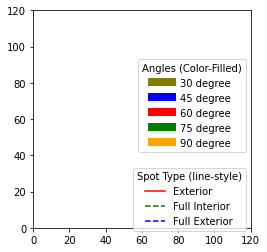

In [20]:
Draw(r'C:\Users\mayda\Python practice\OR\LP_results_new.csv')

# DRAW(B=40, L=60, w=7, X=np.array([0,0,1,0,0]), Xe=np.array([0,0,1,0,0]), E=np.array([0,1,0,0,0]))

#DRAW(B=120, L=120, w=7, X=np.array([0,1,5,0,0]), Xe=np.array([0,0,1,1,0]), E=np.array([0,0,0,0,0]))  

#DRAW(B=20, L=120, w=7, X=np.array([0,0,0,0,0]), Xe=np.array([0,0,0,0,0]), E=np.array([0,1,1,0,0]))